In [1]:
from fastai.vision.all import *

In [2]:
from pathlib import Path

In [3]:
path = Path("/ocean/projects/mch210010p/shared/MP_data_gray_writable")

In [4]:
test_files = get_image_files(path)

## Load data

Set aside a random 20% for validation, set seed so it is always the same during development

In [5]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, seed=21)

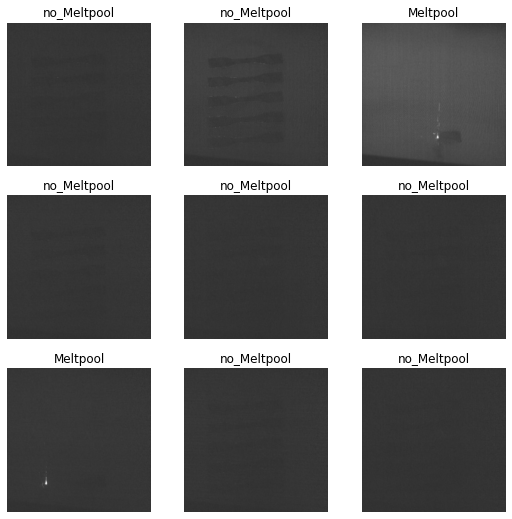

In [6]:
dls.show_batch()

In [7]:
dls.valid_ds.items[:3]

[Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/MP_spatter/0197097.jpg'),
 Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/no_Meltpool/0074810.jpg'),
 Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/Meltpool/0308820.jpg')]

In [8]:
im = Image.open(dls.valid_ds.items[0])

In [9]:
im.shape

(300, 300)

In [10]:
np.min(im)

47

In [11]:
np.max(im)

253

In [12]:
len(dls.train_ds.items)

6813

In [13]:
len(dls.valid_ds.items)

1703

In [14]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.204437,0.057250,0.987082,0.012918,00:19


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.050664,0.044289,0.990605,0.009395,00:24


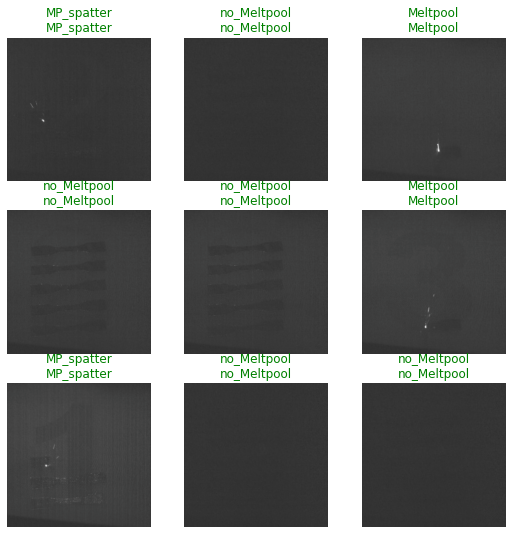

In [15]:
learn.show_results()

In [16]:
interp = Interpretation.from_learner(learn)

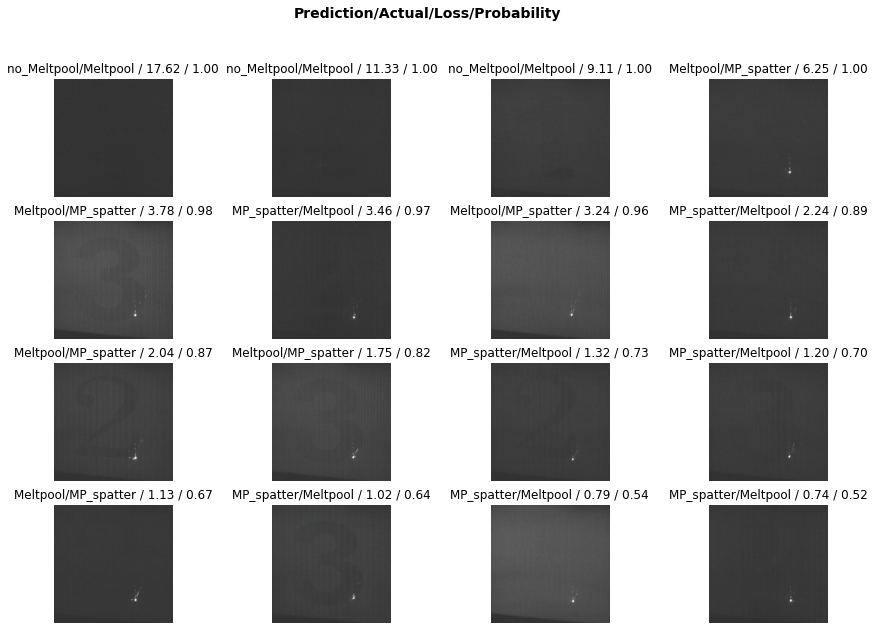

In [17]:
interp.plot_top_losses(16, figsize=(15,10))

In [18]:
top_losses_indices = interp.top_losses(16)[1]

In [19]:
top_losses_images = [dls.valid_ds.items[each] for each in top_losses_indices]

In [20]:
top_losses_images

[Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/Meltpool/0310337.jpg'),
 Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/Meltpool/0310336.jpg'),
 Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/Meltpool/0310339.jpg'),
 Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/MP_spatter/0000263.jpg'),
 Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/MP_spatter/0000195.jpg'),
 Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/Meltpool/0000102.jpg'),
 Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/MP_spatter/0000232.jpg'),
 Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/Meltpool/0000109.jpg'),
 Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/MP_spatter/0000154.jpg'),
 Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/MP_spatter/0000191.jpg'),
 Path('/ocean/projects/mch210010p/shared/MP_data_gray_writable/Meltpool/0000108.jpg'),
 Path('/ocean/projects/mch210010p